### Imports

In [1]:
from agents.fact_checker_agent import FactCheckerAgent
from network.socialnetwork import SocialNetworkEnv
from agents.news_agent import NewsAgent

### Setup

In [2]:

# --- Scenario 1 : 1 fake, 1 real agent, 1 fact checker, 4 consumer network ---- #
network = SocialNetworkEnv(numConsumer=4)

fAgent = NewsAgent("fake-information", env=network, trustLevel=0)
rAgent = NewsAgent("real-information", env=network, trustLevel=0)
fcAgent = FactCheckerAgent("fact-checker", env=network, trustLevel=0.0)

network.add_news_agents_to_network(agentType=fAgent)
network.add_news_agents_to_network(agentType=rAgent)
network.add_fact_checker_to_network(agentType=fcAgent)

### Training


--------- epoch 0 ---------------------
Trust Levels:

Fake Agent: 
Real Agent: 
consumer info before fact checker is in network

Consumer Node Info:

Node 0 - Trust Level: 0.10, Interactions: 1

Node 1 - Trust Level: 0.00, Interactions: 0

Node 2 - Trust Level: 0.00, Interactions: 2

Node 3 - Trust Level: -0.20, Interactions: 1
Fact Checker Agent: Agent type: fake-information penalty: 2 reward: 2 trust level: 0.5
Agent type: real-information penalty: 1 reward: 2 trust level: 0.5
Fact-checker penalized news agent {'agentType': 'fake-information', 'qVal': 0.0, 'trustLevel': 0.0, 'reward': 2, 'penalty': 2}.
Fact-checker found no fake news in node Agent type: real-information penalty: 1 reward: 2 trust level: 0.5.

fake agent info - reward: 2, penalty : 2, influenced : {0, 2}, qval : 0.0
real agent info - reward: 2, penalty : 1, influenced : {2, 3}, qval : 0.0
fact checker - reward: 1 penalty: 1
consumer info after fact checker in network

Consumer Node Info:

Node 0 - Trust Level: -0.05

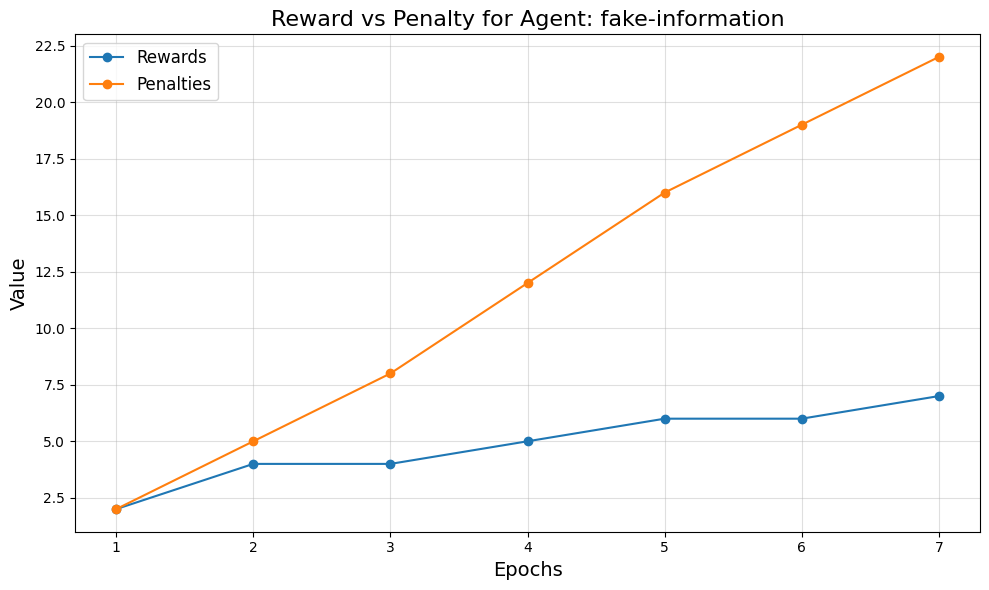

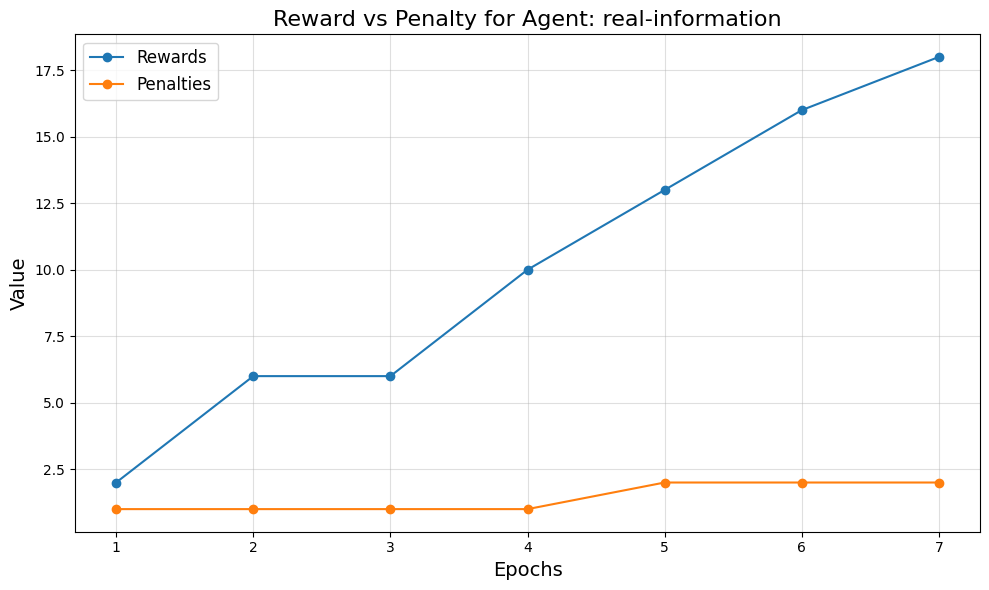

In [ ]:
fake_agent_rewards = []
fake_agent_penalties = []

real_agent_rewards = []
real_agent_penalties = []

fchecker_agent_rewards = []
fchecker_agent_penalties = []

for i in range(network.network_size):
    print(f"\n--------- epoch {i} ---------------------")

    fAgent_action = network.draw_sample_from_action_space()
    rAgent_action = network.draw_sample_from_action_space()
    fcAgent_action = network.draw_sample_from_action_space()

    print("Trust Levels:")

    print("\nFake Agent: ", end="")
    reward, penalty, influenced, qVal = network.step(fAgent_action, fAgent)
    fake_agent_rewards.append(reward)
    fake_agent_penalties.append(penalty)

    print("\nReal Agent: ", end="")
    reward2, penalty2, influenced2, qval2 = network.step(rAgent_action, rAgent)
    real_agent_rewards.append(reward2)
    real_agent_penalties.append(penalty2)

    print("\nconsumer info before fact checker is in network")
    network.print_consumer_info()


    print("Fact Checker Agent: ", end="")
    network.step_fact_checker(fcAgent, threshold=0.1)
    fchecker_agent_rewards.append(fcAgent.reward)
    fchecker_agent_penalties.append(fcAgent.penalty)

    # network.render()

    print(f"\nfake agent info - reward: {reward}, penalty : {penalty}, influenced : {influenced}, qval : {qVal}")
    print(f"real agent info - reward: {reward2}, penalty : {penalty2}, influenced : {influenced2}, qval : {qval2}")
    print(f"fact checker - reward: {fcAgent.reward} penalty: {fcAgent.penalty}")

    print("consumer info after fact checker in network")
    network.print_consumer_info()

network.visualize_rewards_penalties(fAgent, fake_agent_rewards, fake_agent_penalties)
network.visualize_rewards_penalties(rAgent, real_agent_rewards, real_agent_penalties)
network.visualize_rewards_penalties(fcAgent, fchecker_agent_rewards, fchecker_agent_penalties)

